<a href="https://colab.research.google.com/github/Lilly-yang/UCA--Machine_Learning_and_Computer_Vision/blob/main/Project_Automatic_Signal_Detector_6_7_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automatic Signal Detector**
Task 6 - Task 7

## README

The goal of this progress is to make dataset and train MLP.
- Save images with 2 kinds of size: 16x16, 224x224(have done in task3-task5)
- Reshape 16x16 image to 1x256 array
- Save each image as a line with Alphabet and 256 pixels in dataset.txt
- Load and seperate dataset to train and validation data
- Build, train and save model


### Getting Started
The dataset.txt file is in my Google driver will be used in MLP. Make sure you are mounted [my Google driver](https://drive.google.com/drive/folders/1SyAjYyn7sxlJULhwh1kkbA71xfAGkk2A?usp=sharing).

_dataset.txt_


### Running the progress
Running cells in each part except these 2 cells which I marked as ***!!!don't need to run again***


### Authors
Li YANG   li.yang-li@etu.univ-cotedazur.fr

## Mounted Google Driver

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task6 - Create dataset

I have 50-100 images for each **A, B, C, F, I, L, O, X, V, W and Y**
  * for 'F, I, L, O, X, V, W', I made them with right hand by myself. And I expanded the border.
  * for 'A, B, C, V, W', I got them from my mate and she made them by left hand.




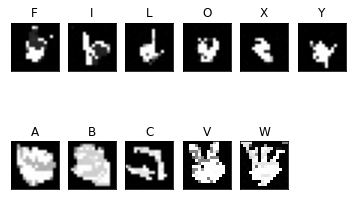

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_A = cv.imread('/content/drive/My Drive/MLCV/train_val_16x16/A_0_16.jpg')
img_B = cv.imread('/content/drive/My Drive/MLCV/train_val_16x16/B_30_16.jpg')
img_C = cv.imread('/content/drive/My Drive/MLCV/train_val_16x16/C_31_16.jpg')
img_F = cv.imread('/content/drive/My Drive/MLCV/train_val_16x16/F_38_16.jpg')
img_I = cv.imread('/content/drive/My Drive/MLCV/train_val_16x16/I_76_16.jpg')
img_L = cv.imread('/content/drive/My Drive/MLCV/train_val_16x16/L_28_16.jpg')
img_O = cv.imread('/content/drive/My Drive/MLCV/train_val_16x16/O_29_16.jpg')
img_V = cv.imread('/content/drive/My Drive/MLCV/train_val_16x16/V_2_16.jpg')
img_W = cv.imread('/content/drive/My Drive/MLCV/train_val_16x16/W_45_16.jpg')
img_X = cv.imread('/content/drive/My Drive/MLCV/train_val_16x16/X_63_16.jpg')
img_Y = cv.imread('/content/drive/My Drive/MLCV/train_val_16x16/Y_16_16.jpg')

img = [['F',img_F], ['I',img_I], ['L',img_L], ['O',img_O], ['X',img_X], ['Y',img_Y], ['A',img_A], ['B',img_B], ['C',img_C], ['V',img_V], ['W',img_W]]
plt.figure()
for i in range(11):
  ax = plt.subplot(2,6,i+1)
  ax.set_title(img[i][0])
  plt.imshow(img[i][1])
  plt.xticks([])
  plt.yticks([])
plt.show()

### Transform images to dataset.txt
* Read these images  
* Resize 16x16 image to an array of size (1,256) 
*   write in a text file, each line will have in the first position the uppercase letter and then the 256 values of the images

    For example: `W,1,1,1,229,...,1`

In [ ]:
from PIL import Image
import numpy as np
import os

path = '/content/drive/My Drive/MLCV/train_val_16x16'
dataset_file_path = '/content/drive/My Drive/MLCV/dataset.txt'



*   ***!!!For codes below, don't need to run again***



In [ ]:
f = open(dataset_file_path, "a")

for inx, file_name in enumerate(os.listdir(path)):
  ## Read image
  I = Image.open(os.path.join(path, file_name))

  ## Resize (16,16) image to (1,256)
  I_arr = np.array(I)
  I_arr = np.resize(I_arr, (1,256))

  ## Reform image to str: W,1,1,226,...,1
  I_str = [str(i) for i in list(I_arr[0])]
  I_str = ','.join(I_str)  
  data_temp = file_name[0]+','+I_str

  ## Show progress
  if not inx%50:
    print('%d / %d \n %s'%(inx, len(os.listdir(path)), data_temp))

  ## Write alphabet and pixeles in to .txt file   
  f.write(data_temp+'\n')

f.close()

0 / 996 
 X,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,2,0,0,2,0,3,0,0,0,0,0,0,1,0,0,1,0,2,0,2,2,0,2,0,0,1,1,0,0,1,2,1,1,0,4,0,0,0,1,1,0,0,0,3,0,0,0,0,0,0,0,2,2,1,0,0,0,1,0,0,1,3,0,0,4,0,0,0,0,255,255,0,3,1,0,6,0,0,3,0,0,1,0,3,4,0,23,255,0,0,0,0,0,1,3,1,0,0,3,0,255,255,237,255,255,2,0,0,3,0,0,2,0,0,0,14,209,254,255,255,255,0,0,0,1,0,1,0,0,0,2,1,255,254,255,40,34,2,3,0,0,5,0,2,0,0,0,2,0,38,255,255,253,29,3,1,0,0,2,0,0,3,0,1,4,0,113,255,255,37,0,1,0,4,0,1,1,0,5,0,0,2,0,22,255,36,1,0,3,0,2,0,0,0,2,3,0,3,0,0,43,17,0,0,0,0,0,2,0,2,0,0,2,0,1,1,0,3,0,0,2,2,0,1,0,0,2,0,0,2,0,1,0,0,1,0,0,0,0
50 / 996 
 Y,2,0,0,0,1,0,0,0,0,4,0,0,0,0,1,0,0,2,2,1,0,0,1,0,0,0,1,2,0,0,0,0,1,0,0,0,4,2,0,0,1,1,3,0,0,1,2,0,1,0,0,0,0,0,0,1,0,0,0,0,2,1,0,2,0,0,0,0,1,0,3,0,0,1,3,2,0,0,2,0,2,0,1,0,255,0,0,0,0,1,0,0,7,2,0,1,0,0,3,0,37,2,0,4,3,0,4,0,0,2,0,1,1,0,0,4,183,188,255,253,34,124,0,1,255,0,3,0,0,1,0,0,0,255,255,211,35,34,0,76,0,1,1,0,0,0,0,1,0,255,254,255,30,36,253,253,4,0,0,0,0,0,0,2,0,27,255,255,38,31,35,71,0,0,0,1,0,2,0,0,

### Shuffle the lines of dataset file



* Coyied from CV course home page
*   ***!!!For codes below, don't need to run again***





In [ ]:
import random
lines = open(dataset_file_path).readlines()
random.shuffle(lines)
open(dataset_file_path, 'w').writelines(lines)

## Task7 - Create MLP



### Load dataset for trainnig 
*   read the dataset file
*   seperate it to two arrays: samples and letters

In [ ]:
def load_dataset(dataset_file_path):
    a = np.loadtxt(dataset_file_path, delimiter=',', converters={ 0 : lambda ch : ord(ch)-ord('A') })
    samples, letters = a[:,1:], a[:,0]
    return samples, letters

samples, letters = load_dataset(dataset_file_path)
print(samples[:3])
print(letters[:10])

[[  2.   0.   0.   2.   0.   1.   0.   0.   0.   2.   0.   0.   0.   4.
    0.   1.   0.   1.   1.   0.   0. 244. 253. 250. 208.   1.   2.   0.
    0.   0.   0.   0.   0.   1.   1. 207. 255. 253. 211. 255. 255. 254.
    0.   3.   0.   0.   4.   2.   0.   0.   1. 208. 207. 229. 207. 243.
  217. 255. 235. 254. 251.   2.   0.   0.   0.   2.   1. 205. 209. 255.
  204. 255. 207. 207. 255. 207. 253.   0.   4.   0.   0.   0.   0. 255.
  253. 255. 255. 253. 209. 212. 253. 255. 253.   0.   0.   0.   0.   5.
    2. 205. 207. 204. 209. 208. 206. 205. 211. 255. 255.   0.   1.   0.
    0.   0.   0. 244. 254. 255. 253. 255. 255. 229. 251. 254. 255.   0.
    0.   1.   1.   1.   0. 208. 253. 255. 235. 254. 255. 255. 253. 208.
  254. 210.   0.   1.   0.   2. 229. 255. 255. 255. 253. 255. 206. 203.
  209. 208. 210. 253.   0.   0.   2.   0. 255. 251. 254. 252. 207. 255.
  255. 255. 252. 253. 226. 175.   3.   0.   0.   0.   0. 244. 255. 255.
  255. 254. 203. 255. 208. 255. 255.   0.   0.   3.   1.   0.   

### set partecepante for dataset that will use for training and validation



In [ ]:
train_ratio = 0.8
n_train_samples = int(len(samples) * train_ratio)
x_train, y_train = samples[:n_train_samples], letters[:n_train_samples]
x_val, y_val = samples[n_train_samples:], letters[n_train_samples:]

### Use Keras library to build and train the MLP.



####   Build MLP

    Setting parameters and build ML model framwork



In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

## the biggest value of label is 'Y' = 24, so the num_classes should be 25(include 0)
num_classes = 25
epochs = 500

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

## 0-1 normolazition
x_train /= 255
x_val /= 255
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'test samples')

## convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

## model-sequential
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(256,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

## print model formate
model.summary()

## set optimizer, especially the learn rate
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

## compile model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

796 train samples
200 test samples
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 25)                1625      
Total params: 42,777
Trainable params: 42,777
Non-trainable params: 0
_________________________________________________________________


#### train model

    In the traning process, i have changed the epoches, number of dense blockes and it's layers, the dropout ratio, and the learn rate a lot of times. 
    PS: Because the results of each tuning are not fully recorded during the tuning process, the results given below (except the final result) are given an impression.

1.   for the original version got from CV course home page, Sorry I don’t remember the details, but I think val_loss> 1 is a calculation error
```
Validation loss: 0.0*
Validation accuracy: 1.*
```
2.   then I added one more dense block and changed the dropout ration for each dense bolok, which I don't get better validation loss and accuracy.

3. then i increased epoches from 10-100, i noticed there are some improve but not that much.

4. then i incrased epoches from 100 to 1000, the loss are decreasing but val-loss decreased firstly then increasing when trainning. In other words, the model is over fitted
```
Validation loss: 0.7*
Validation accuracy: 0.9*
```

5. Then i uncommented the last Dense block and reset the optimizer which learn rate is 0.001. I got a satisfactory result
```
Validation loss: 0.13428444683551788
Validation accuracy: 0.9599999785423279
```




In [ ]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Train on 796 samples, validate on 200 samples
Epoch 1/500
796/796 [==============================] - 0s 187us/step - loss: 3.2419 - accuracy: 0.0528 - val_loss: 3.0522 - val_accuracy: 0.1500
Epoch 2/500
796/796 [==============================] - 0s 60us/step - loss: 3.0452 - accuracy: 0.0917 - val_loss: 2.8495 - val_accuracy: 0.2450
Epoch 3/500
796/796 [==============================] - 0s 58us/step - loss: 2.8336 - accuracy: 0.1495 - val_loss: 2.6528 - val_accuracy: 0.2500
Epoch 4/500
796/796 [==============================] - 0s 59us/step - loss: 2.6643 - accuracy: 0.1935 - val_loss: 2.4598 - val_accuracy: 0.3050
Epoch 5/500
796/796 [==============================] - 0s 58us/step - loss: 2.5204 - accuracy: 0.2085 - val_loss: 2.2788 - val_accuracy: 0.3800
Epoch 6/500
796/796 [==============================] - 0s 58us/step - loss: 2.4306 - accuracy: 0.2261 - val_loss: 2.1254 - val_accuracy: 0.4850
Epoch 7/500
796/796 [==============================] - 0s 60us/step - loss: 2.2870 - accu



#### save the model and weights



In [ ]:
# The following lines will help you to save the model and the weights. Because remember that every time you train your model the initialization is random then you will have different results.

model_json = model.to_json()
with open("/content/drive/My Drive/MLCV/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/drive/My Drive/MLCV/model_weights.h5")
print("Saved model to disk")

Saved model to disk
